# Data Analyses and Visualization



In [1]:
# Import packages
import copy
import math
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [12]:
# Import prepared datasets
precip_flat = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\precip_flat.csv')
precip_multi = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\precip_multi.csv')
unique_stations = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\unique_stations.csv')
unique_basins = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\unique_basins.csv')
unique_stations.head(2)


,Unnamed: 0,Region,Basin Name,CITY,STATION,First_year_collected,Last_year_collected,Months_sampled,Months_not_reported,Percent_months_reported
0,0,Connecticut River,CONNECTICUT,Amherst,AMH307,1997,2019,264,44,0.833333
1,22,Connecticut River,CONNECTICUT,Amherst,AMHNWS,1838,2015,2136,0,1.000000


## Stations over time

In [3]:
# Set visual choices.
sns.set(font_scale=2)
sns.set_theme(style="ticks", palette=None)


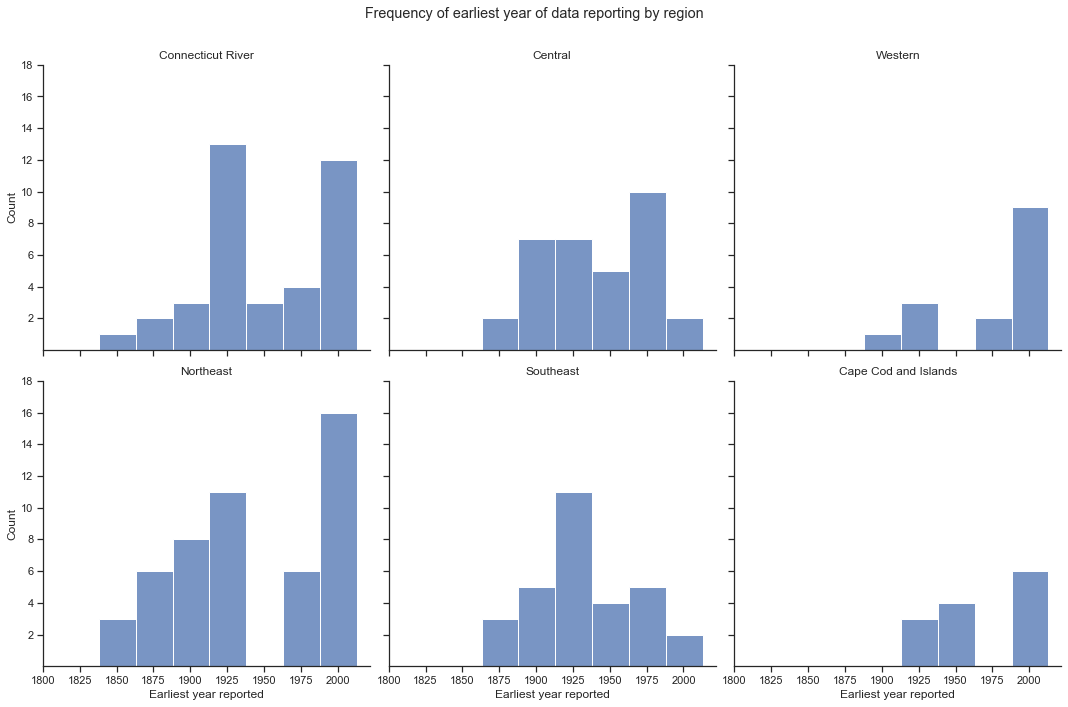

In [9]:
# Plot Frequency of earliest year of data collection by region
first_year_plot = sns.displot(data=unique_stations, 
                kind='hist',
                x="First_year_collected", 
                col="Region",
                col_wrap=3,
                binwidth=25
                )

first_year_plot.set_axis_labels("Earliest year reported")
first_year_plot.set_titles("{col_name}")

first_year_plot.set(xticks=range(1800,2025,25), yticks=[2, 4, 6, 8, 10, 12, 14, 16, 18])

first_year_plot.fig.subplots_adjust(top=.9)
first_year_plot.fig.suptitle("Frequency of earliest year of data reporting by region")

# plt.show()
plt.savefig('Frequency-earliest-year-by-region.png')


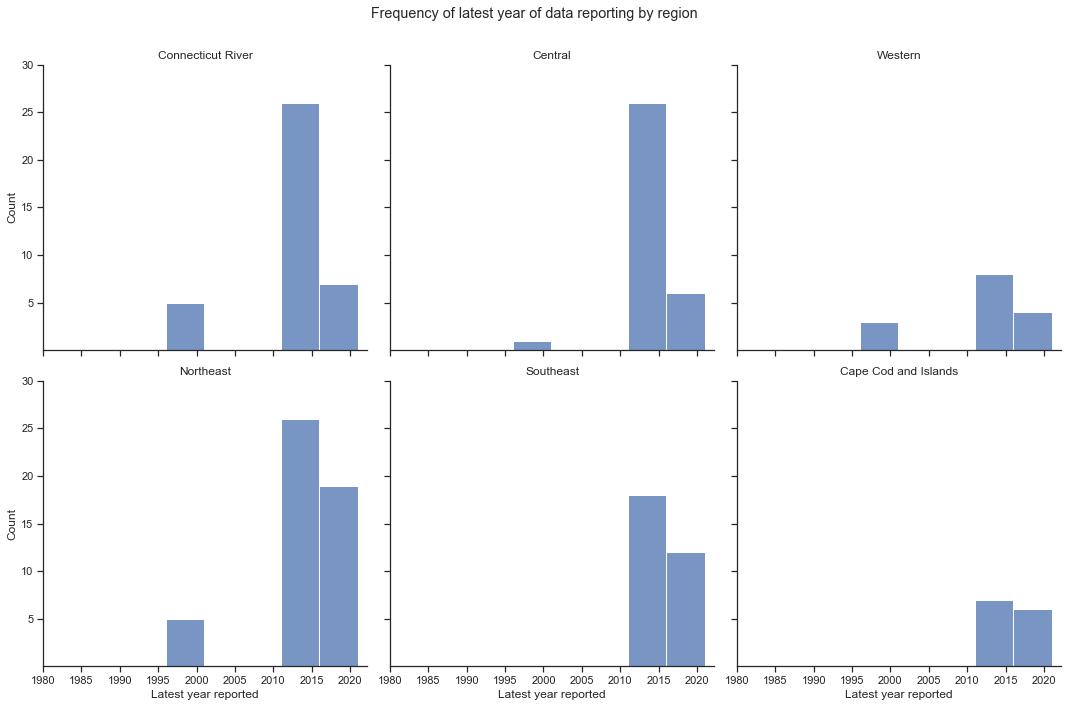

In [10]:
# Plot Frequency of earliest year of data collection by region
last_year_plot = sns.displot(data=unique_stations, 
                kind='hist',
                x="Last_year_collected", 
                col="Region",
                col_wrap=3,
                binwidth=5
                )

last_year_plot.set_axis_labels("Latest year reported")
last_year_plot.set_titles("{col_name}")

last_year_plot.set(xticks=range(1980,2025,5), yticks=[5, 10, 15, 20, 25, 30])

last_year_plot.fig.subplots_adjust(top=.9)
last_year_plot.fig.suptitle("Frequency of latest year of data reporting by region")

#plt.show()
plt.savefig('Frequency-latest-year-by-region.png')


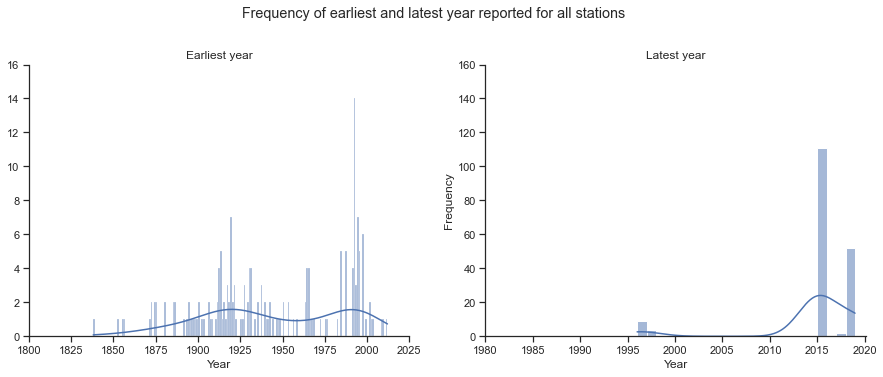

In [11]:
# Plot frequency of latest year reported for all stations
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(ax=axes[1], 
             data=unique_stations,
             x="Last_year_collected",
             binwidth=1,
             kde=True
            )

axes[1].set(xticks=range(1980,2025,5), yticks=range(0,180,20))
axes[1].set(xlabel="Year", ylabel="Frequency", title="Latest year")

sns.histplot(ax=axes[0],
             data=unique_stations,
             x="First_year_collected",
             binwidth=1,
             kde=True
            )

axes[0].set(xticks=range(1800,2050,25), yticks=range(0,18,2))
axes[0].set(xlabel="Year", ylabel="", title="Earliest year")

fig.suptitle("Frequency of earliest and latest year reported for all stations", y=1.04)

sns.despine()

#plt.show()
plt.savefig('Frequency-year-by-station.png')


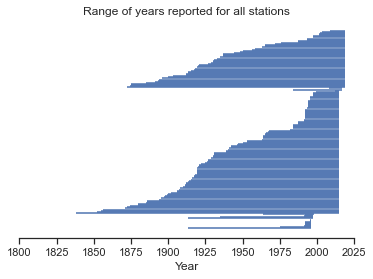

In [7]:
# Plot earliest and latest data reporting date for each station.
n_stations = len(unique_stations) + 1 # This needs the plus one to work. Do not remove.
unique_stations = unique_stations.sort_values(by=['Last_year_collected', 'First_year_collected']) # Sorting makes it pretty.

g = plt.hlines(range(1,n_stations), unique_stations['First_year_collected'], unique_stations['Last_year_collected'])

g.axes.get_yaxis().set_ticks([]) # Hide y-axis ticks.
plt.xlim(1800,2025)
plt.xlabel("Year")
plt.title("Range of years reported for all stations")

sns.despine(left=True)

# plt.show()
plt.savefig('Range-years-by-station.png')


## 